In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
def customized_mse(y_true, y_pred):
    """自定义损失函数"""
    return tf.reduce_mean(tf.square(y_pred - y_true))
    

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()
model.compile(loss=customized_mse, optimizer=keras.optimizers.SGD(0.001), metrics=["mean_squared_error"])
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train_scaled, y_train,
                   validation_data=(x_valid_scaled, y_valid),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 742us/step - loss: 1.8948 - mean_squared_error: 1.8948 - val_loss: 0.9114 - val_mean_squared_error: 0.9114
Epoch 2/100
363/363 [==============================] - 0s 469us/step - loss: 0.7355 - mean_squared_error: 0.7355 - val_loss: 0.7549 - val_mean_squared_error: 0.7549
Epoch 3/100
363/363 [==============================] - 0s 462us/step - loss: 0.6676 - mean_squared_error: 0.6676 - val_loss: 0.7139 - val_mean_squared_error: 0.7139
Epoch 4/100
363/363 [==============================] - 0s 442us/step - loss: 0.6391 - mean_squared_error: 0.6391 - val_loss: 0.6838 - val_mean_squared_error: 0.6838
Epoch 5/100
363/363 [==============================] - 0s 459us/step - loss: 0.6165 - mean_squared_error: 0.6165 - val_loss: 0.6586 - val_mean_squared_error: 0.6586
Epoch 6/100
363/363 [==============================] - 0s 456us/step - loss: 0.5960 - mean_squared_error: 0.5960 - val_loss: 0.6403 - val_mean_squared_error: 0.6403
Epoch 7/10

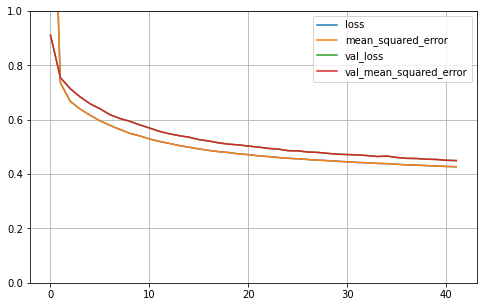

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled, y_test)